<a href="https://colab.research.google.com/github/audreychela/Audrey_first_repo/blob/main/Phase_3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHURN PREDICTION DATASET**

✍ **Step 1: Business understanding.**

SyriaTel is facing the challenge of customer churn, where customers leave for competitors, reducing revenue and profitability. To remain competitive, the company needs to predict churn and understand its main drivers, so that proactive retention strategies can be implemented.



**Key Stakeholder:**
The Customer Retention Manager will use the model and insights to design and apply targeted retention strategies.

**Problem statement**

SyriaTel lacks a reliable system to identify customers at risk of churn. The absence of such a tool results in unexpected customer losses. A predictive model is needed to classify customers into churners and non-churners and to highlight the main factors influencing churn.



**Objectives:**

1. To identify key factors that influence churn.

2. To provide actionable recommendations to support customer retention strategies.

3. To build a predictive model to classify customers into churn and non-churn.

**Business Questions**
1. Which customers are most likely to churn?
2. What are the main factors driving churn?
3. How can SyriaTel reduce churn and improve retention?



**Metrics of Success.**

1. Achieve at least 80% recall on the churn class, while monitoring accuracy, F1-score and ROC-AUC.
2. Enable the customer retention manager to implement strategies that lead to a measurable reduction in churn rate.



**Step 2: Data Understanding.**

**2.1 Data Overview**

I am working on the SyriaTel Customer Churn dataset, which contains 3,333 customer records with the following features:

**2.2 Dataset Columns Explanation**

**Customer Identification**

**state →**   The U.S. state where the customer lives. Useful to check if churn rates differ by region.

 **account_length →**  Number of days the customer has been with SyriaTel. Longer account length might mean more loyalty.

**area code →**  Telephone area code. May hint at regional usage patterns.

**phone number →**   Unique identifier for each customer.

**Service Plans.**  
1. **International plan →**  Whether the customer has subscribed to an international calling plan (yes or no). Customers with this plan tend to churn more.

2. **voice mail plan →**  Whether the customer has a voice mail service plan (yes or no). Customers with this plan usually churn less.

3. **number vmail messages →**  Number of voice mail messages. Higher values are tied to customers who use voicemail actively.




In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
#import sklearn libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTEN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Loading dataset


In [2]:
# load and reading the dataset
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data[:5]


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


**Observations:**
The dataset values are uniform from top to bottom.

In [4]:
#checking shape
print(f" The dataset has {data.shape[0]} records and {data.shape[1]} columns")

 The dataset has 3333 records and 21 columns


In [5]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Observations: The dataset has 17 numerical and 4 categorical columns.

In [6]:
#remove white space
data.columns = [col.replace(" ", "_") for col in data.columns]
data[:5]

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# concise summary
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
#checking summary for categorical columns
data.describe(include="O")

,state,phone_number,international_plan,voice_mail_plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,400-4344,no,no
freq,106,1,3010,2411


In [9]:
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [10]:
#checking unique values
for col in data:
  unique_col = data[col].unique()
  print(f"{col}\n, {unique_col}\n")

state
, ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account_length
, [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 

**Data Preparation**

**Data cleaning**

In [11]:
#make a copy
data_1 = data.copy(deep=True)

In [12]:
# dropping phone number column
del data_1["phone_number"]
data_1[:4]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


In [13]:
#check the null values
data_1.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


In [14]:
#check duplicates
data_1.duplicated().sum()

np.int64(0)

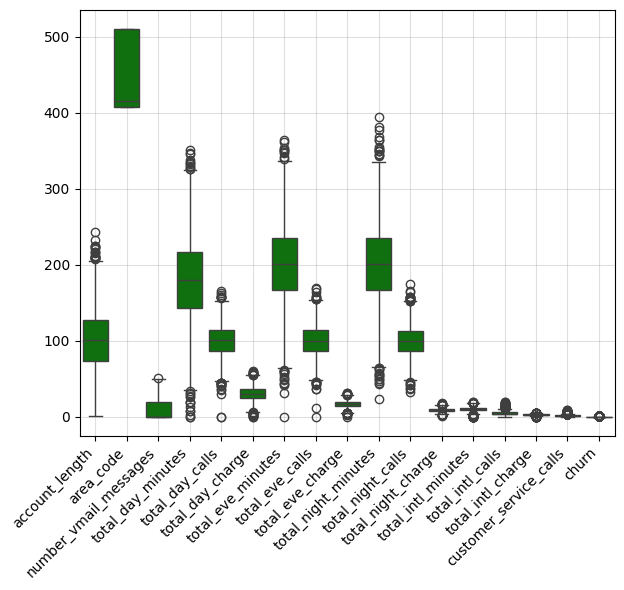

In [15]:
#checking outliers
sns.boxplot(data=data_1, color="g")
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.grid(alpha=.4)
plt.show()

Observations:
The outliers are genuine. They’re not random mistakes and they represent heavy users, frustrated customers, or power subscribers, which are exactly the people the telecom company cares about when predicting churn.

In [16]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

3.**EXPLORATORY ANALYSIS.**

**3.1 UNIVARIATE ANALYSIS.**

Univariate analysis is the study of one variable at a time to understand it better. For numbers, it looks at average, spread, and outliers using tools like histograms or boxplots. For categories, it counts how often each value appears, often shown in bar charts. The goal is to see patterns, detect errors, and understand the data before exploring relationships with other variables.



<Axes: xlabel='churn', ylabel='count'>

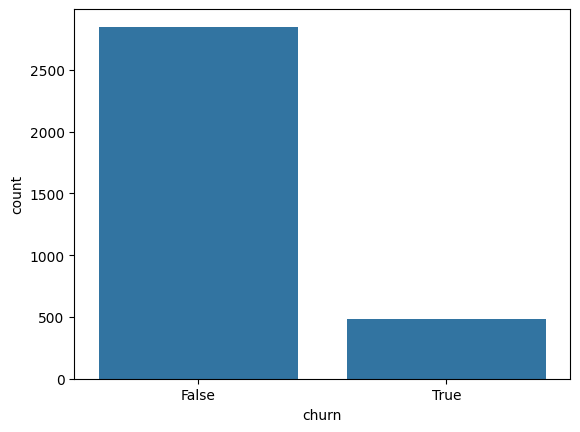

In [17]:
#visualise churn column
sns.countplot(x="churn", data=data_1)

Observations:  This shows that most customers did not churn, while only a small proportion did.

<Axes: xlabel='customer_service_calls', ylabel='Count'>

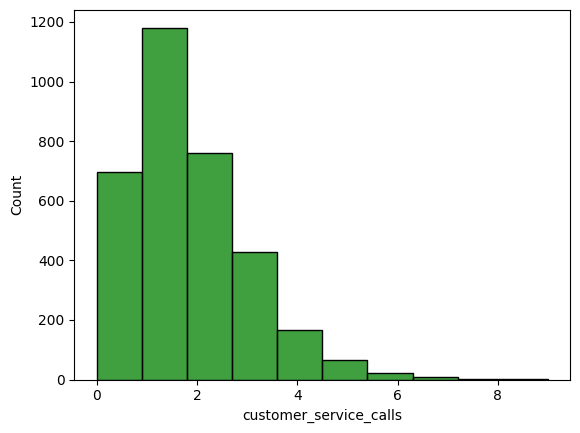

In [18]:
#Dustribution of customer service calls
sns.histplot(data_1["customer_service_calls"], bins=10, kde=False, color="g")

Observations:
The histogram shows that most customers made between 0 and 3 service calls, with the number decreasing as calls increase. A smaller group made 4 or more calls, which may indicate dissatisfaction and a higher likelihood of churn.

<Axes: xlabel='total_day_minutes', ylabel='Count'>

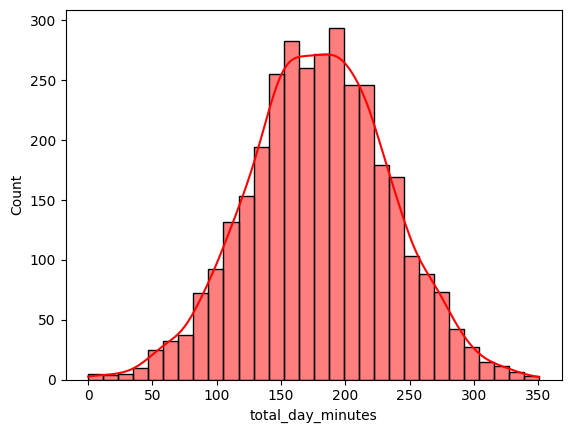

In [19]:
# distribution of total day minutes
sns.histplot(data_1["total_day_minutes"], bins=30, kde=True, color="red")


Observations:
the histogram shows a roughly normal distribution, with most customers clustered around the mid-range and fewer at the extremes. A few customers have very high usage, appearing as outliers. This suggests that while most customers use a moderate amount of daytime minutes, heavy users exist and could influence churn behavior.



In [20]:
print(plt.colormaps(), end=" ")

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

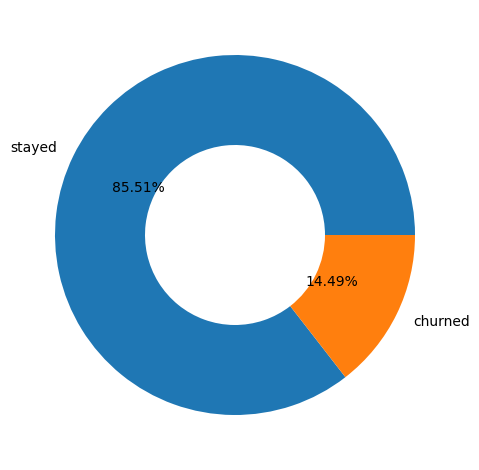

In [21]:
churn_v = data_1.churn.value_counts(ascending=False)
label = ["stayed", "churned"]
 #plot the donut chart
color = sns.color_palette("magma")
plt.pie(churn_v,labels=label, autopct="%.2f%%", wedgeprops=dict(width=.5))
plt.tight_layout()

**Observation:**

The donut chart shows that most customers stayed with the company, while a smaller percentage churned.
It shows that there is class imbalance in our dataset.

In [22]:
#feature engineering on total_day_minutes

# Bin total_day_minutes into 4 quantiles
data_1["day_usage_bin"] = pd.qcut(
    data_1["total_day_minutes"],
    q=4,
    labels=["low", "medium", "high", "very high"]
)

# Check distribution of new bins
print(data_1["day_usage_bin"].value_counts())


day_usage_bin
low          837
very high    833
medium       832
high         831
Name: count, dtype: int64


In [23]:
#data_1["service_calls_bin"] = pd.qcut(
    #data_1["customer_service_calls"],
    #q=4,
    #labels=["very few calls", "few calls", "many calls", "very many calls"],
    #duplicates="drop")


**Bivariate Analysis**



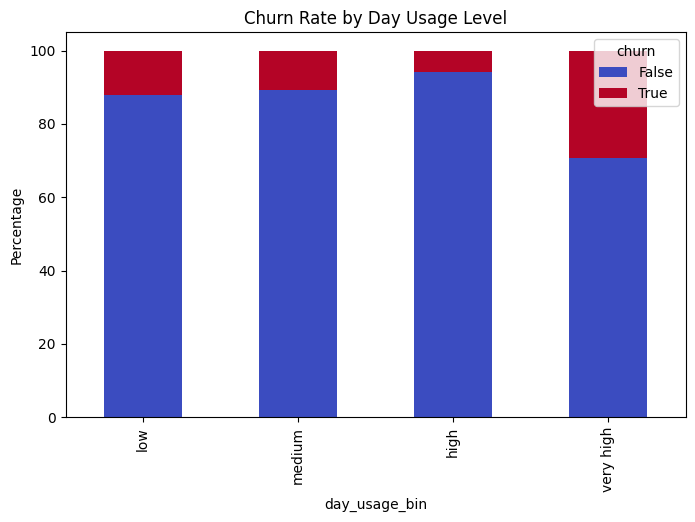

In [24]:
churn_by_bin = pd.crosstab(data_1["day_usage_bin"], data_1["churn"], normalize="index") * 100
#print(churn_by_bin)
churn_by_bin.plot(kind="bar", stacked= True, colormap="coolwarm", figsize=(8,5))
plt.title("Churn Rate by Day Usage Level")
plt.ylabel("Percentage")
plt.show()




**Observations:**

The analysis shows that customers in the low usage group have the lowest churn rate, while those in the high and very high usage groups are more likely to churn. This suggests that heavy daytime users, who generate higher charges, are more dissatisfied and prone to leaving, whereas light users remain more stable.

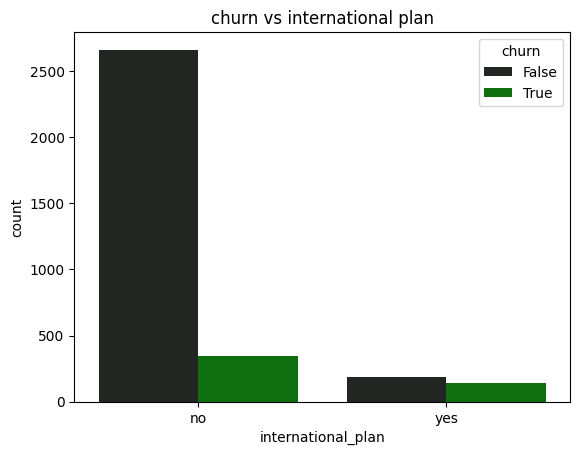

In [25]:
#international plan vs churn
sns.countplot(x="international_plan", hue ="churn", data=data_1, color="g")
plt.title("churn vs international plan")
plt.show()

The plot shows that customers with an international plan are more likely to churn compared to those without the plan. Most non-international plan users tend to stay, suggesting that having an international plan may be linked to higher churn risk.

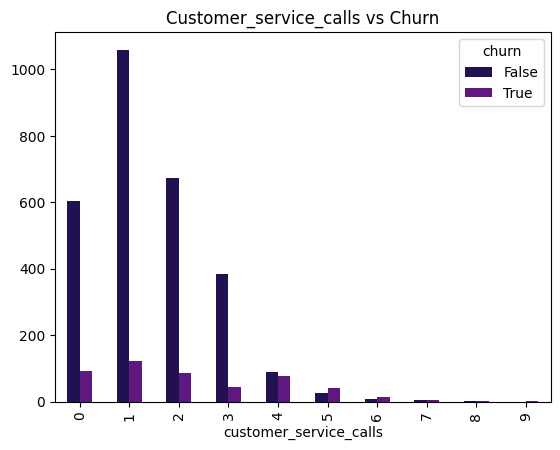

In [26]:
pd.crosstab(data_1["customer_service_calls"], data_1["churn"]).plot(kind="bar", color=color )
plt.title("Customer_service_calls vs Churn")
plt.show()

This shows that as the number of customer service calls increases, the likelihood of churn also rises. Customers with more service calls are more likely to leave, indicating that frequent complaints may lead to churn.

Text(0.5, 1.0, 'Voice_mail_plan vs Churn')

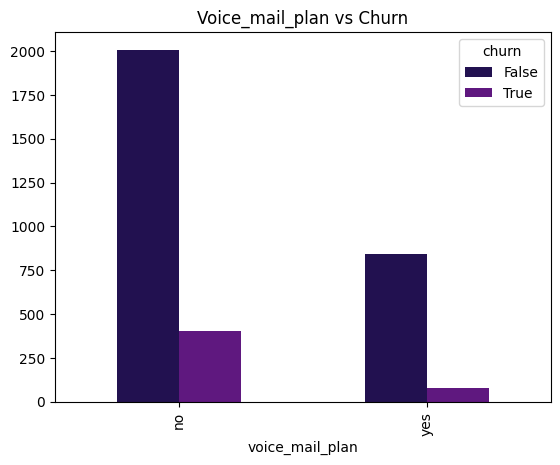

In [27]:
pd.crosstab(data_1["voice_mail_plan"], data_1["churn"]).plot(kind="bar", color=color)
plt.title("Voice_mail_plan vs Churn")

**Observations:**

Customers with a voice mail plan tend to churn less compared to those without one. Most customers without a voice mail plan stay.

Text(0.5, 1.0, 'Area_code vs Churn')

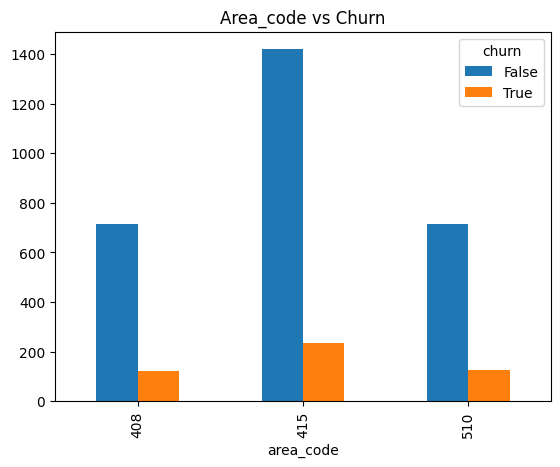

In [28]:
pd.crosstab(data_1["area_code"], data_1["churn"]).plot(kind="bar")
plt.title("Area_code vs Churn")

observations:

In [29]:
#cor=data_1.corr()
#plt.figure= (12,8)
#sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
#plt.title("correlation Heatmap")
#plt.show()

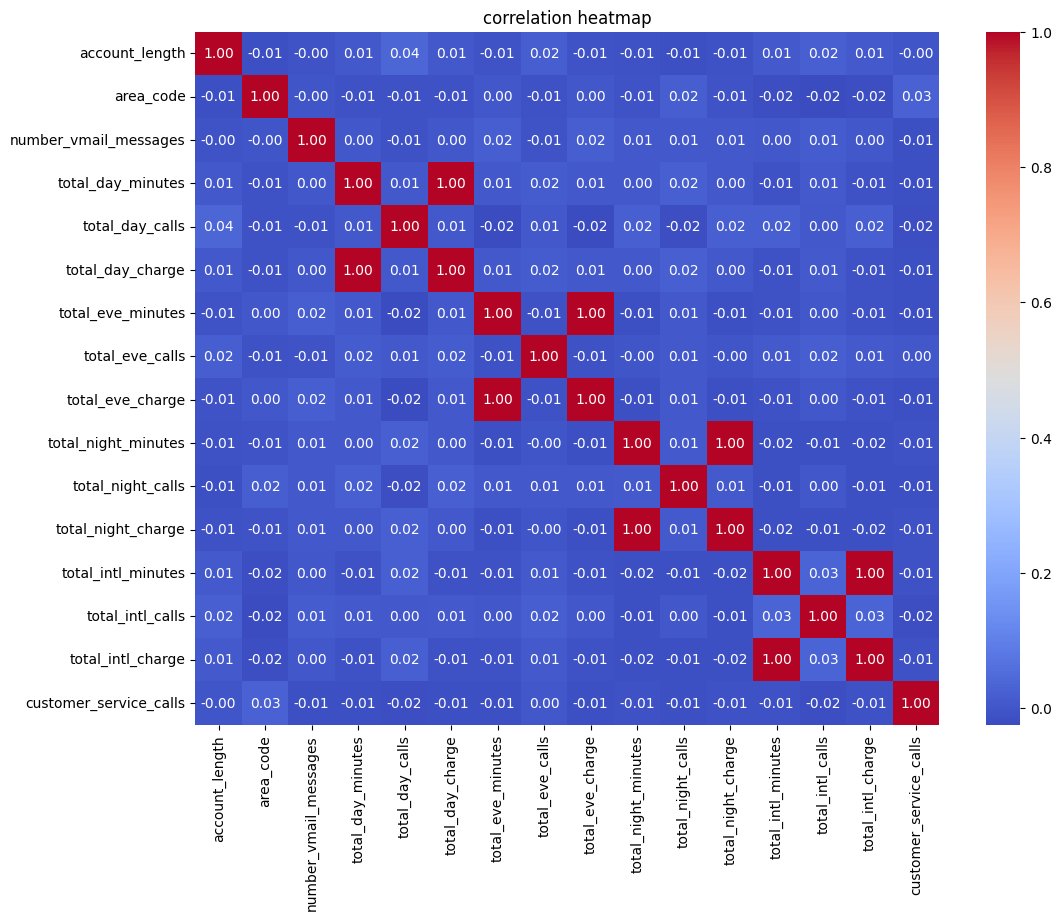

In [31]:
#correlation matrix
cor=data_1.select_dtypes("number").corr()

#plot heatmap
plt.figure(figsize=(12,9))
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation heatmap")
plt.show()

observation:  this shows that the perfect positive correlation (r=1.00) between minutes and charges for all times of day, which is expected since the charge is based on usage. All other variables, like account_length and area_code, have no significant linear correlation with one another

**Multivariate Analysis.**


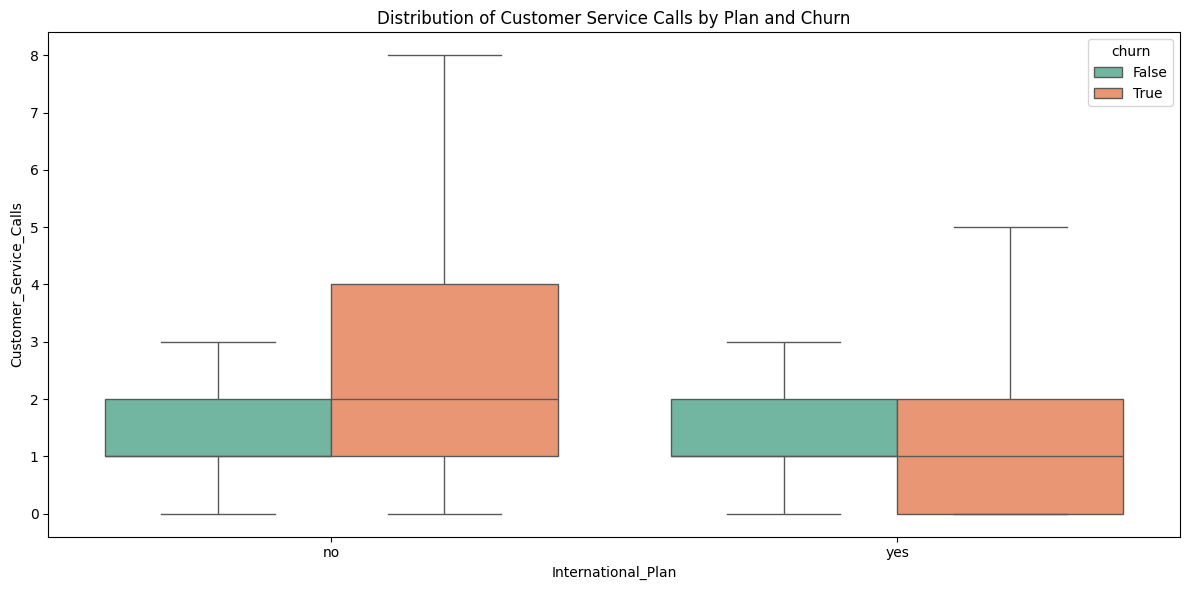

In [32]:
#distribution of customer_service_calls
plt.figure(figsize=(12, 6))
sns.boxplot(x='international_plan', y='customer_service_calls', hue='churn', data=data_1, palette='Set2', showfliers=False)
plt.title('Distribution of Customer Service Calls by Plan and Churn')
plt.xlabel('International_Plan')
plt.ylabel('Customer_Service_Calls')
plt.tight_layout()
plt.show()

Observations:
Customers with an international plan who also have high day-time usage are most likely to churn. While customers who churn generally use more total day minutes than those who don't, the effect is magnified for those with an international plan. This suggests that the combination of both factors creates a powerful indicator of churn, likely due to high costs or frustration with service on the international plan.

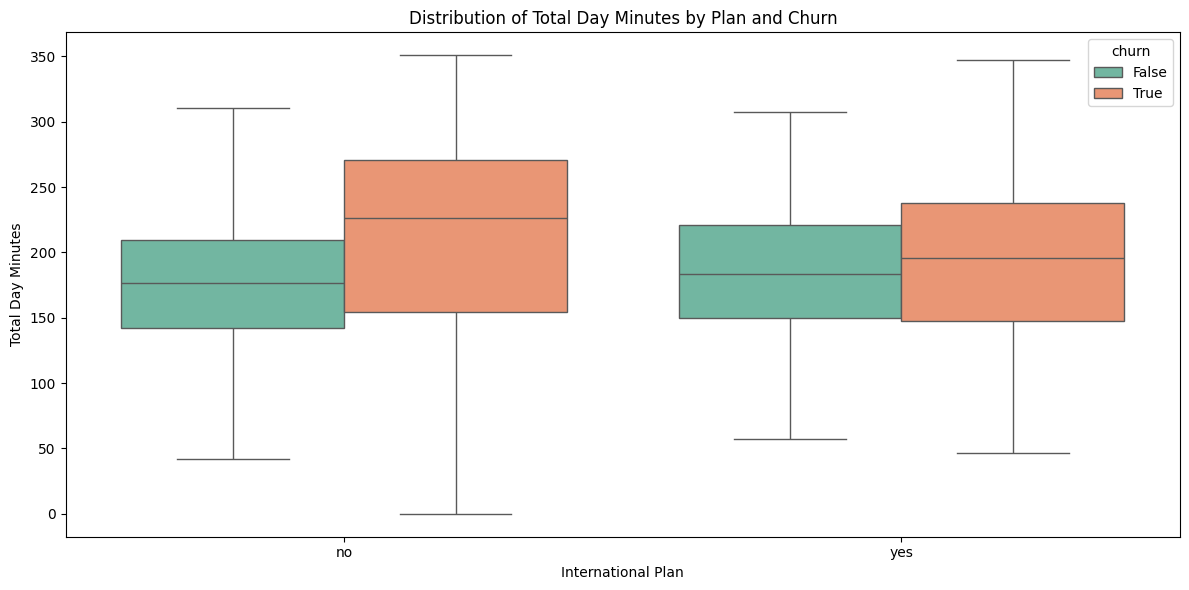

In [33]:
#group comparison on call behaviour
plt.figure(figsize=(12, 6))
sns.boxplot(x='international_plan', y='total_day_minutes', hue='churn', data=data_1, palette='Set2', showfliers=False)
plt.title('Distribution of Total Day Minutes by Plan and Churn')
plt.xlabel('International Plan')
plt.ylabel('Total Day Minutes')
plt.tight_layout()
plt.show()


Observations:
Customers who churn have a higher average total day minutes and this trend is especially strong among those who have an international plan.

In [34]:
#scatterplot

**Statistical and Hypothesis testing**

After using exploratory data analysis to visualize the dataset, lets apply the statistical and hypothesis testing to formally validate the initial observations.

The goal of this step is to determine if the differences and relationships observed between customer groups; those who churned and those who didn't, are **statistically significant,** meaning they are not due to random chance.

To do this, will perform two key tests:

**T-tests**-  for the  numerical features to see if there is a significant difference in the average values between churned and non-churned customers.

**Chi-Squared tests**-  for the categorical features to determine if there is a statistically significant relationship between a customer's plan type and their churn status.


In [35]:
#make a copy
data_2 = data_1.copy(deep=True)

In [36]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   object  
 1   account_length          3333 non-null   int64   
 2   area_code               3333 non-null   int64   
 3   international_plan      3333 non-null   object  
 4   voice_mail_plan         3333 non-null   object  
 5   number_vmail_messages   3333 non-null   int64   
 6   total_day_minutes       3333 non-null   float64 
 7   total_day_calls         3333 non-null   int64   
 8   total_day_charge        3333 non-null   float64 
 9   total_eve_minutes       3333 non-null   float64 
 10  total_eve_calls         3333 non-null   int64   
 11  total_eve_charge        3333 non-null   float64 
 12  total_night_minutes     3333 non-null   float64 
 13  total_night_calls       3333 non-null   int64   
 14  total_night_charge      

In [37]:
data_2.shape

(3333, 21)

In [38]:
#dropping columns
data_st = data_2.drop(columns=["area_code", "total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"])

In [39]:
data_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   object  
 1   account_length          3333 non-null   int64   
 2   international_plan      3333 non-null   object  
 3   voice_mail_plan         3333 non-null   object  
 4   number_vmail_messages   3333 non-null   int64   
 5   total_day_minutes       3333 non-null   float64 
 6   total_day_calls         3333 non-null   int64   
 7   total_eve_minutes       3333 non-null   float64 
 8   total_eve_calls         3333 non-null   int64   
 9   total_night_minutes     3333 non-null   float64 
 10  total_night_calls       3333 non-null   int64   
 11  total_intl_minutes      3333 non-null   float64 
 12  total_intl_calls        3333 non-null   int64   
 13  customer_service_calls  3333 non-null   int64   
 14  churn                   

In [40]:
numeric_colns= data_st.select_dtypes(include= ['float64', 'int64']).columns.tolist()
cat_colns = data_st.select_dtypes(include=['object']).columns.tolist()

In [41]:
#remove churn from numerical list
if "churn" in numeric_colns:
  numeric_colns.remove("churn")
  print("Numerical columns:", numeric_colns)
  print("Categorical columns:", cat_colns)


T-Tests(Numerical vs churn):
customer_service_calls: p-value=0.0000Significant


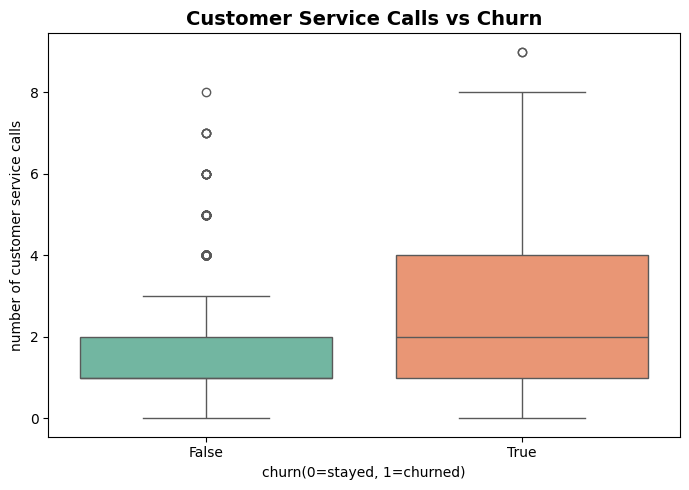

In [42]:
# T_test for numerical columns
from scipy import stats
print("\nT-Tests(Numerical vs churn):")
for col in numeric_colns:
  churned=data_st[data_st["churn"]==1][col]
  not_churned= data_st[data_st["churn"]==0][col]
  #perform t_test
t_stat, p_val = stats.ttest_ind(churned, not_churned, equal_var=False)
result = "Significant" if p_val < 0.05 else "Not Significant"
print(f"{col}: p-value={p_val:.4f}{result}")

plt.figure(figsize=(7,5))
sns.boxplot(x="churn", y="customer_service_calls", data=data_st, palette="Set2")
plt.title("Customer Service Calls vs Churn", fontsize=14, weight= "bold")
plt.xlabel("churn(0=stayed, 1=churned)")
plt.ylabel("number of customer service calls")
plt.tight_layout()
plt.show()


In [43]:
#performing T-test on numerical columns
# Store results in a list of dictionaries
from scipy import stats

t_test_summary = []

for col in numeric_colns:
    churned = data_st[data_st['churn'] == 1][col]
    not_churned = data_st[data_st['churn'] == 0][col]

    t_stat, p_val = stats.ttest_ind(churned, not_churned, equal_var=False)#, nan_policy="omit")

    t_test_summary.append({
        "Feature": col,
        "T-statistic": round(t_stat, 4),
        "p-value": round(p_val, 4),
        "Significance": "Significant" if p_val < 0.05 else "Not Significant"
    })
    # Convert to DataFrame
t_test_data = pd.DataFrame(t_test_summary)

t_test_data


,Feature,T-statistic,p-value,Significance
0,account_length,0.9619,0.3365,Not Significant
1,number_vmail_messages,-5.8213,0.0000,Significant
2,total_day_minutes,9.6846,0.0000,Significant
3,total_day_calls,1.0024,0.3165,Not Significant
4,total_eve_minutes,5.2724,0.0000,Significant
5,total_eve_calls,0.5374,0.5912,Not Significant
6,total_night_minutes,2.1709,0.0303,Significant
7,total_night_calls,0.3488,0.7273,Not Significant
8,total_intl_minutes,3.9389,0.0001,Significant
9,total_intl_calls,-2.9604,0.0032,Significant


**Interpretation of T-test results: **
**Not Significant Features (p > 0.05):**

**account_length**, **total_day_calls, total_eve_calls **and **total_night_calls** show no significant difference between churned and non-churned customers.
**Significant Features (p < 0.05):**

**number_vmail_messages (-5.82):** Customers with fewer voicemail messages are more likely to churn.

**total_day_minutes (9.68)**: Higher day-time call usage is strongly associated with churn.

**total_eve_minutes (5.27)**: Evening minutes are significantly higher among churners.

**total_night_minutes (2.17):** Night call usage shows a smaller but significant difference.

**total_intl_minutes (3.94):**  International call duration is strongly linked to churn.

**total_intl_calls (-2.96)**: Customers making fewer international calls tend to churn more.

**customer_service_calls (8.96):** Frequent customer service calls are a strong indicator of churn.




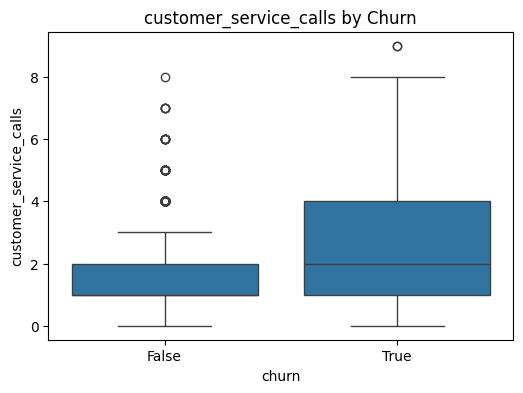

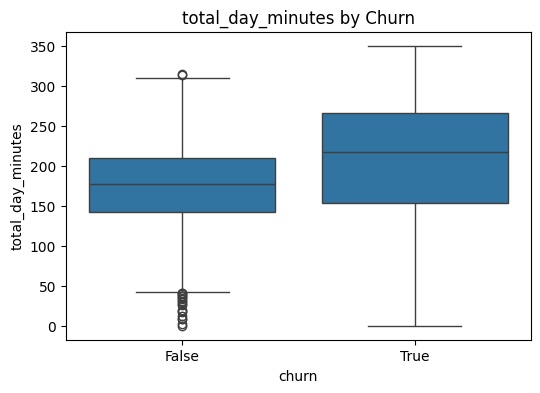

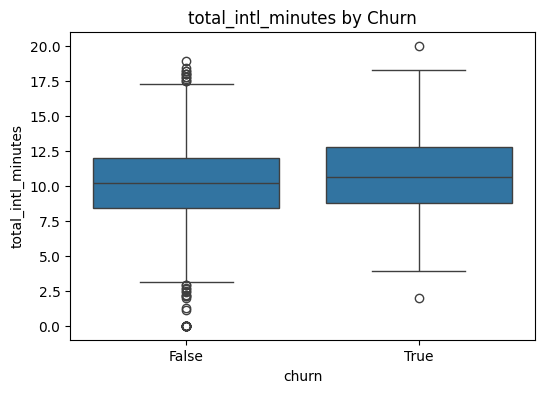

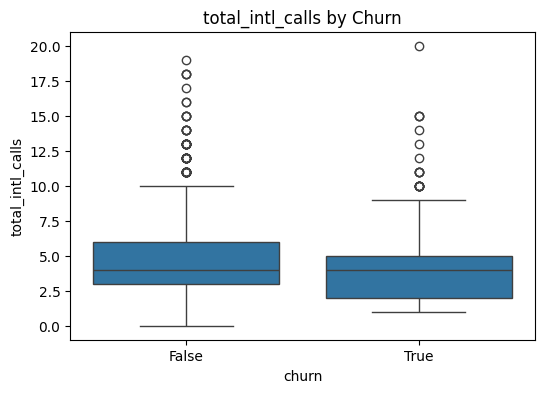

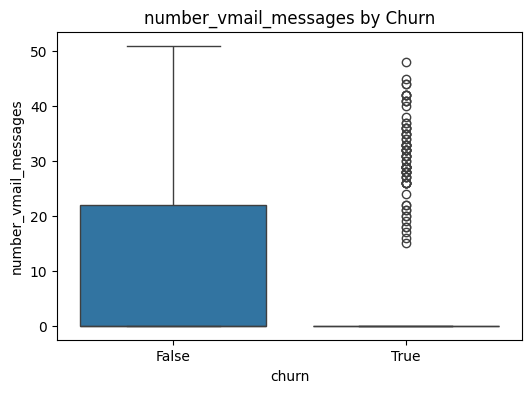

In [44]:
focus_numeric = ["customer_service_calls", "total_day_minutes",
                 "total_intl_minutes", "total_intl_calls",
                 "number_vmail_messages"]

for col in focus_numeric:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="churn", y=col, data=data_st)
    plt.title(f"{col} by Churn")
    plt.show()


In [45]:
# keeping  results in a list of dictionaries
from scipy.stats import chi2_contingency

chi_summary=[]

for coln in cat_colns:
  contingency= pd.crosstab(data_st[coln], data_st["churn"])
  chi2, p_val, dof, expected = chi2_contingency(contingency)
  chi_summary.append({"Feature": coln,
                      "Chi2": round(chi2, 4),
                      "p-value": round(p_val, 4),
                      "DOF":dof,
                      "Significant": "Significant" if p_val<0.05 else "Not Significant"
  })
#convert to DataFrame
chi2_results = pd.DataFrame(chi_summary)
chi2_results


,Feature,Chi2,p-value,DOF,Significant
0,state,83.0438,0.0023,50,Significant
1,international_plan,222.5658,0.0000,1,Significant
2,voice_mail_plan,34.1317,0.0000,1,Significant


**Interpretation of Chi-square results:**

**State:**

*   Churn rates vary significantly across states.
*   Some states may have higher churn due to service quality, competition or regional customer behavior.


**international_plan**

*   Customers with an international plan are far more likely to  churn.
*   This is one of the strongest categorical predictors of churn.
*   This could mean the plan is costly, unattractive or fails to meet customer expectations.


**voice_mail_plan**


*   Churn is also significantly associated with whether customers have a voicemail plan.

*   Customers without voicemail plans might be more likely to churn, possibly because voicemail is seen as a useful feature that increases stickiness.




**Modeling**


**Data Preprocessing.**



In [46]:
data_3 = data_st.copy(deep=True)

In [47]:
data_3[:5]

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,day_usage_bin
0,KS,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,very high
1,OH,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,medium
2,NJ,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,very high
3,OH,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,very high
4,OK,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,medium


In [48]:
data_3.columns

Index(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'customer_service_calls', 'churn', 'day_usage_bin'],
      dtype='object')

In [49]:
#dropping state column
data_model = data_3.drop(columns=["state"])

In [50]:
#check
data_model.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,day_usage_bin
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,very high
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,medium
2,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,very high
3,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,very high
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,medium


In [51]:
#check shape
data_model.shape

(3333, 15)

In [52]:
#label encoding
le = LabelEncoder()
data_model["voice_mail_plan"] = le.fit_transform(data_model["voice_mail_plan"])
data_model["international_plan"] = le.fit_transform(data_model["international_plan"])
data_model["churn"] = le.fit_transform(data_model["churn"])
data_model

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,day_usage_bin
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,very high
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,medium
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,very high
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,very high
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,medium
3329,68,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,very high
3330,28,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,high
3331,184,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,high


In [53]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   account_length          3333 non-null   int64   
 1   international_plan      3333 non-null   int64   
 2   voice_mail_plan         3333 non-null   int64   
 3   number_vmail_messages   3333 non-null   int64   
 4   total_day_minutes       3333 non-null   float64 
 5   total_day_calls         3333 non-null   int64   
 6   total_eve_minutes       3333 non-null   float64 
 7   total_eve_calls         3333 non-null   int64   
 8   total_night_minutes     3333 non-null   float64 
 9   total_night_calls       3333 non-null   int64   
 10  total_intl_minutes      3333 non-null   float64 
 11  total_intl_calls        3333 non-null   int64   
 12  customer_service_calls  3333 non-null   int64   
 13  churn                   3333 non-null   int64   
 14  day_usage_bin           

In [54]:
#merging call minutes columns
data_model["total_call_minutes"]= ( data_model["total_day_minutes"] +
                                   data_model["total_eve_minutes"] +
                                    data_model["total_night_minutes"]+
                                    data_model["total_intl_minutes"]

)

In [55]:
#merging calls
data_model["total_calls"]= ( data_model["total_day_calls"] +
                                   data_model["total_eve_calls"] +
                                    data_model["total_night_calls"]+
                                    data_model["total_intl_calls"]

)

In [56]:
#rename columns

In [57]:
data_model.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'customer_service_calls', 'churn', 'day_usage_bin',
       'total_call_minutes', 'total_calls'],
      dtype='object')

In [58]:
data_model = data_model.drop(columns=["total_day_minutes","total_day_calls", "total_eve_minutes", "total_eve_calls", "total_night_minutes","total_night_calls", "total_intl_minutes","total_intl_calls"])
data_model

,account_length,international_plan,voice_mail_plan,number_vmail_messages,customer_service_calls,churn,day_usage_bin,total_call_minutes,total_calls
0,128,0,1,25,1,0,very high,717.2,303
1,107,0,1,26,1,0,medium,625.2,332
2,137,0,0,0,0,0,very high,539.4,333
3,84,1,0,0,2,0,very high,564.8,255
4,75,1,0,0,3,0,medium,512.0,359
...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,2,0,medium,660.7,292
3329,68,0,0,0,3,0,very high,585.4,239
3330,28,0,0,0,2,0,high,675.6,264
3331,184,1,0,0,2,0,high,517.6,336


In [59]:
print(data_model)

      account_length  international_plan  ...  total_call_minutes  total_calls
0                128                   0  ...               717.2          303
1                107                   0  ...               625.2          332
2                137                   0  ...               539.4          333
3                 84                   1  ...               564.8          255
4                 75                   1  ...               512.0          359
...              ...                 ...  ...                 ...          ...
3328             192                   0  ...               660.7          292
3329              68                   0  ...               585.4          239
3330              28                   0  ...               675.6          264
3331             184                   1  ...               517.6          336
3332              74                   0  ...               755.4          276

[3333 rows x 9 columns]


In [60]:
#features labels from features
X = data_model.drop("churn", axis=1)
y= data_model.churn


In [61]:
#one-hot encode day_usage_bin column
X_encoded= pd.get_dummies(X, columns=['day_usage_bin'], drop_first= True)

In [62]:
#train_test split
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y, test_size=.2, random_state=42, stratify=y )
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2666, 10), (667, 10), (2666,), (667,))

In [63]:
data_model.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'customer_service_calls', 'churn',
       'day_usage_bin', 'total_call_minutes', 'total_calls'],
      dtype='object')

In [64]:
#scaling numerical columns
numeric_colns = ["account_length", "number_vmail_messages","customer_service_calls","total_call_minutes","total_calls"]

scaler= StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_colns] = scaler.fit_transform(X_train[numeric_colns])
X_test_scaled[numeric_colns] = scaler.transform(X_test[numeric_colns])


In [65]:
# models
#Base model(logistic regresion)
lr= LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [66]:
print(f"The model score on the dataset is {lr.score(X_train_scaled, y_train)*100:.2f}%")

The model score on the dataset is 86.08%


In [67]:
#check prediction and accuaracy
y_pred = lr.predict(X_test_scaled)

#accuracy
accuracy_score(y_test, y_pred)*100


85.6071964017991

<Axes: >

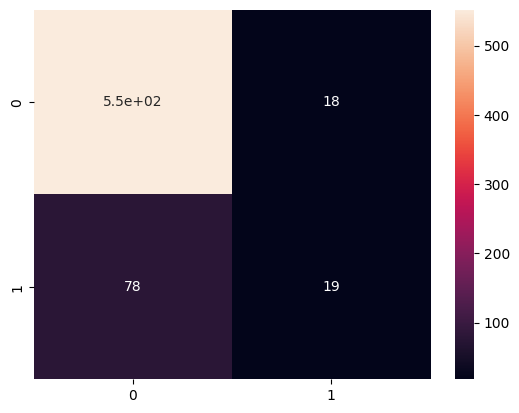

In [68]:
#checking the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)

In [69]:
# Identify numerical and categorical features for preprocessing
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Build the Preprocessing Pipeline
# Create a preprocessor to transform numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model 1 of Logistic Regression
print("Training and Evaluating Logistic Regression Model with Balanced Class Weights ---")
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])
logistic_pipeline.fit(X_train, y_train)
y_pred_lr = logistic_pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Training and Evaluating Logistic Regression Model with Balanced Class Weights ---
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       570
           1       0.33      0.74      0.46        97

    accuracy                           0.75       667
   macro avg       0.64      0.75      0.65       667
weighted avg       0.86      0.75      0.78       667

Confusion Matrix:
[[427 143]
 [ 25  72]]


In [70]:

#accuracy
accuracy_score(y_test, y_pred_lr)*100


74.81259370314842

**Model 1 Interpretation**:

* **True negatives**: the model correctly predicted that  430 customers would not churn.

*   **False Positives**: the model incorrectly predicted that 140 customers would churn.

*   **True Positives**: The model correctly 72 customers who actually churned.

*   **False Negatives**: The model incorrectly predicted that 25 customers would not churn when they actually did.

**Metrics**

**Recall**: TP/(TP+FN)=72/(72+25)=0.742

The model is correctly identifying 74.2% of all churning customers.

**Precision**: TP/(TP+FP)=72/(72+140)=0.34

As a trade-off, the precision has decreased. When the model says a customer will churn, it corrects about 34% of the time. This means it is raising more false alarms, but it is successfully catching most of the real churners.


Text(0.5, 23.52222222222222, 'Predicted')

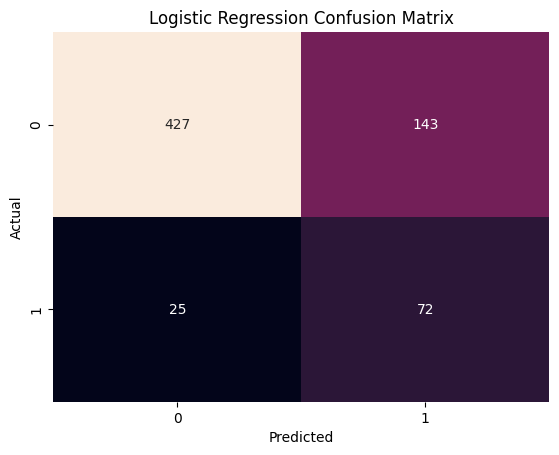

In [71]:
#confusion matrix on lr
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [72]:
#creating auc logistic reg
y_pred_proba = logistic_pipeline.predict_proba(X_test)[:,1]
#calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Logistic Regression AUC: {auc_score:.4f}")

Logistic Regression AUC: 0.8133


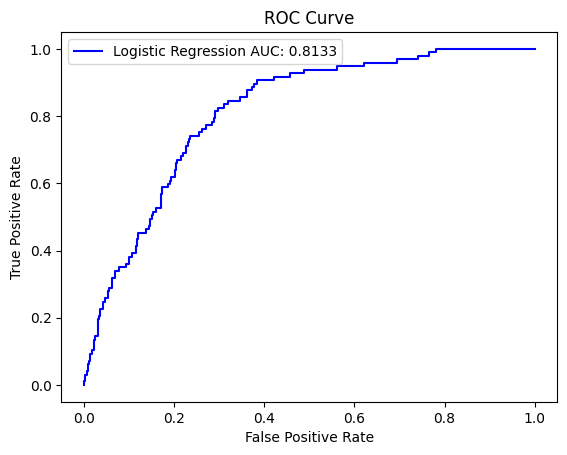

In [73]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='blue', label= f"Logistic Regression AUC: {auc_score:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**Observations:**

AUC = 0.8133  This means the logistic regression model has 81.3% probability of correctly distinguishing between churners and non-churners.

In [74]:
# decision Tree model
print("Training and Evaluating Decision Tree Model")
dtree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42,class_weight='balanced'))
])

dtree_pipeline.fit(X_train,y_train)
y_pred_dtree= dtree_pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,y_pred_dtree))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))



Training and Evaluating Decision Tree Model
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       570
           1       0.50      0.41      0.45        97

    accuracy                           0.85       667
   macro avg       0.70      0.67      0.68       667
weighted avg       0.84      0.85      0.85       667

Confusion Matrix:
[[530  40]
 [ 57  40]]


In [75]:
#accuracy
accuracy_score(y_test, y_pred_dtree)*100


85.45727136431785

Text(0.5, 23.52222222222222, 'Predicted')

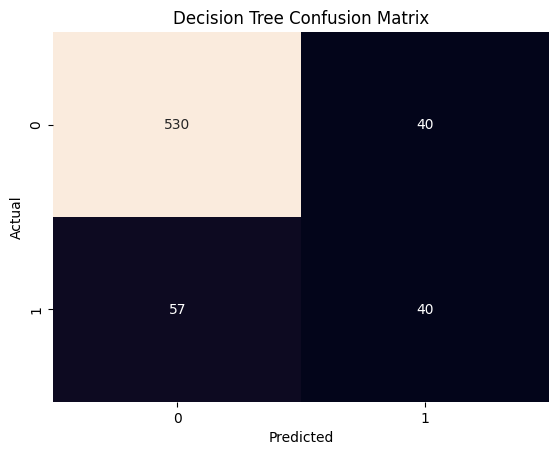

In [76]:
#plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar= False)
plt.title("Decision Tree Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [77]:
#creating auc dtree
y_pred_proba_dtree = dtree_pipeline.predict_proba(X_test)[:,1]
#calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_dtree)
print(f"Decision Tree AUC: {auc_score:.4f}")

Decision Tree AUC: 0.6711


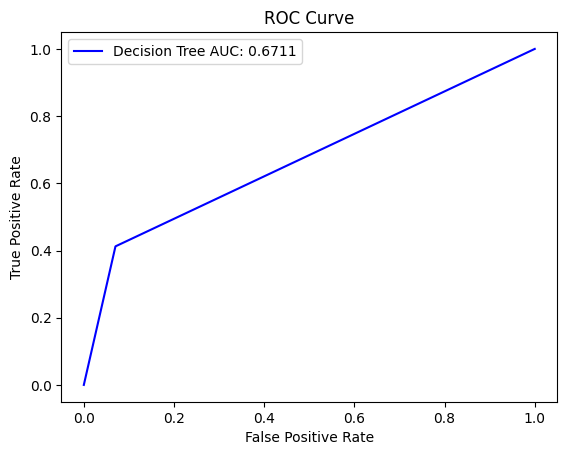

In [78]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dtree)
plt.plot(fpr, tpr, color='blue', label= f"Decision Tree AUC: {auc_score:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [79]:
#Random Forest model
print("Training and Evaluating Random Forest Model")
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,class_weight='balanced'))
])

rf_pipeline.fit(X_train,y_train)
y_pred_rf= rf_pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Training and Evaluating Random Forest Model
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       570
           1       0.65      0.41      0.50        97

    accuracy                           0.88       667
   macro avg       0.78      0.69      0.72       667
weighted avg       0.87      0.88      0.87       667

Confusion Matrix:
[[548  22]
 [ 57  40]]


Text(0.5, 23.52222222222222, 'Predicted')

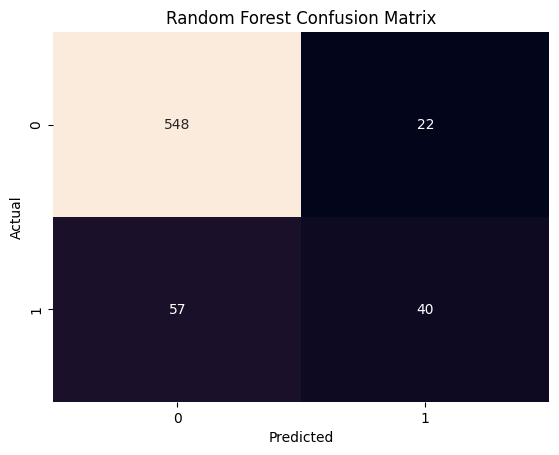

In [80]:
#confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d",cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [81]:
#creating auc rf
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:,1]
#calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest AUC: {auc_score:.4f}")

Random Forest AUC: 0.8730


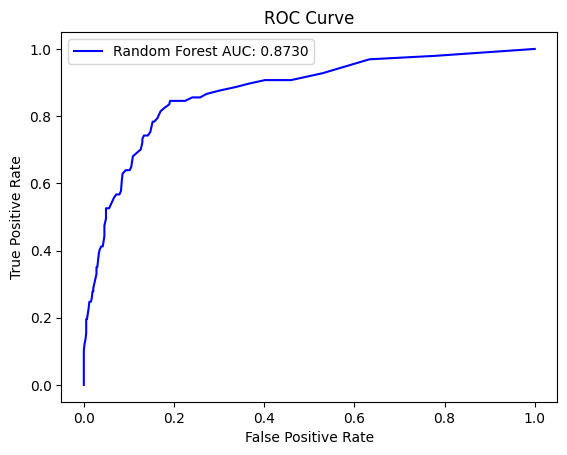

In [82]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, color='blue', label= f"Random Forest AUC: {auc_score:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [83]:
# model XGBoost
print("Training and Evaluating XGBoost Model")
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42,class_weight='balanced'))
])

xgb_pipeline.fit(X_train,y_train)
y_pred_xgb= xgb_pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Training and Evaluating XGBoost Model
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       570
           1       0.63      0.43      0.51        97

    accuracy                           0.88       667
   macro avg       0.77      0.69      0.72       667
weighted avg       0.87      0.88      0.87       667

Confusion Matrix:
[[545  25]
 [ 55  42]]


Text(0.5, 23.52222222222222, 'Predicted')

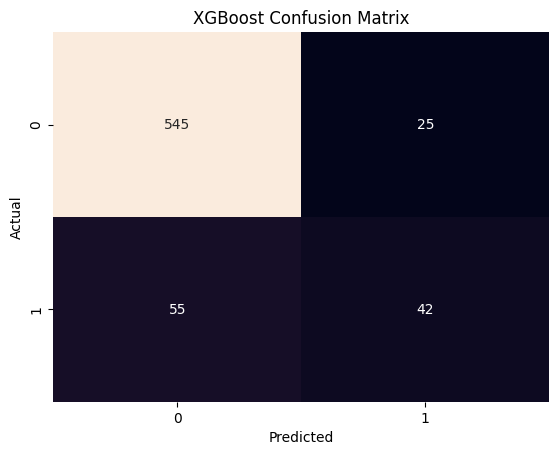

In [84]:
#confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt="d",cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [85]:
#creating auc xgboost
y_pred_proba_xgb = xgb_pipeline.predict_proba(X_test)[:,1]
#calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"XGBoost AUC: {auc_score:.4f}")

XGBoost AUC: 0.8528


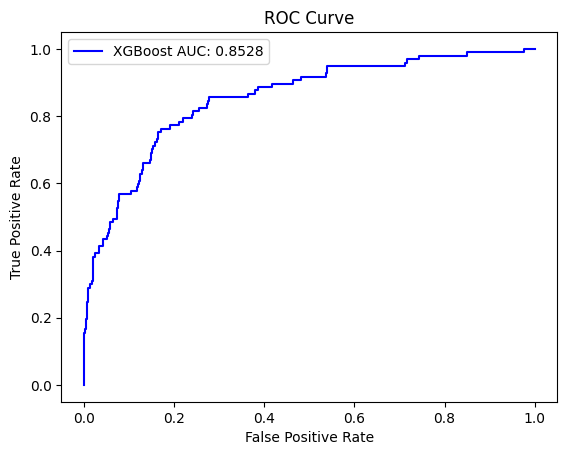

In [86]:
#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr, tpr, color='blue', label= f"XGBoost AUC: {auc_score:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Comaparing Feature Importance Across Models.**


**Feature importance**  tells us how much each feature (column)contributes to predicting the target variable (churn).

* In **tree-based models** (Decision Trees, Random Forest, XGBoost), features that are used to split the dataset near the top of the tree generally contribute more to the prediction.
* Higher importance = stronger predictor of churn.This helps us identify the most influential features and reduce noise by ignoring less important ones.




In [87]:
feature_names = preprocessor.get_feature_names_out().tolist()

 #Get and Print Decision Tree Feature Importance
print("\n Decision Tree Feature Importance: \n")
dtree_importances = dtree_pipeline.named_steps['classifier'].feature_importances_
dtree_features_models = pd.DataFrame({
    'feature': feature_names,
    'importance': dtree_importances
}).sort_values(by='importance', ascending=False)
print(dtree_features_models.head(10))



 Decision Tree Feature Importance: 

                       feature  importance
5      num__total_call_minutes    0.345035
6             num__total_calls    0.158521
4  num__customer_service_calls    0.155260
1      num__international_plan    0.144175
0          num__account_length    0.107616
2         num__voice_mail_plan    0.058559
3   num__number_vmail_messages    0.030834


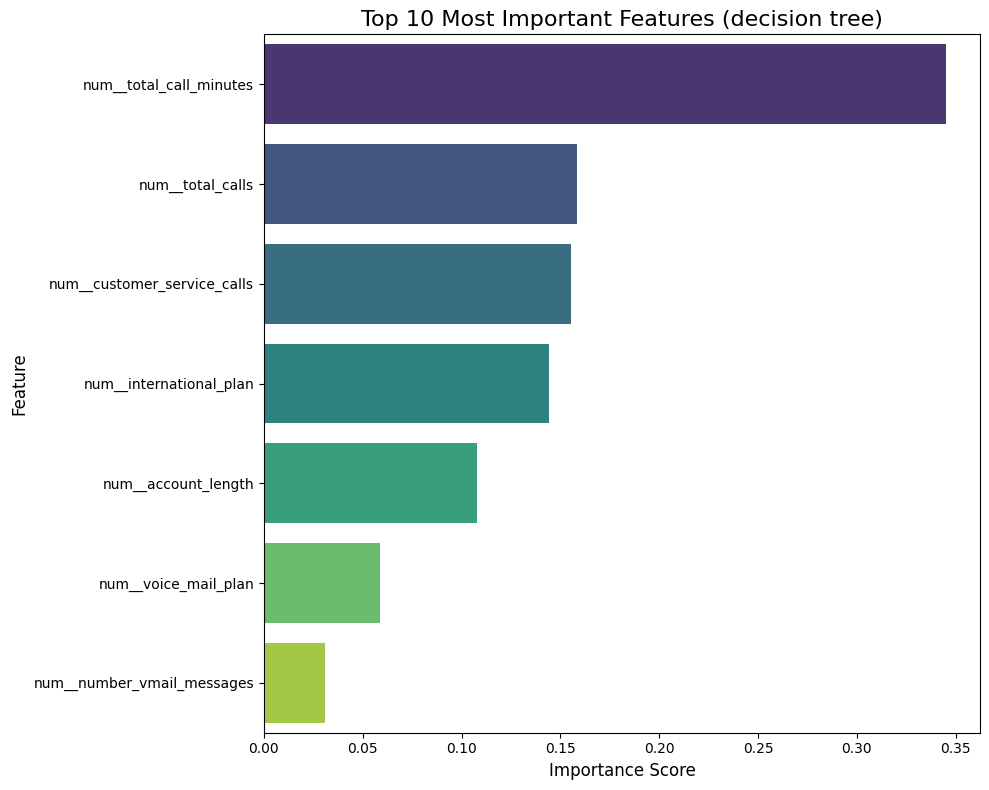

In [88]:
# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=dtree_features_models.head(10), palette='viridis')

plt.title('Top 10 Most Important Features (decision tree)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


**Interpretation:**

**Total call minutes** -Strongest predictor. Customers’ overall call time is a key differentiator of churn behavior.

**Total calls + customer service calls** - Usage frequency and customer complaints both matter.

**International plan**  - Still important but less dominant compared to usage features.

**Account length, voicemail plan, voicemail messages**  - Much weaker predictors of churn.

In [89]:
#Get and Print Random Forest Feature Importance
print("\n Random Forest Feature Importance: \n")
rf_importances = rf_pipeline.named_steps['classifier'].feature_importances_
rf_features_models = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_importances
}).sort_values(by='importance', ascending=False)
print(rf_features_models.head(10))



 Random Forest Feature Importance: 

                       feature  importance
5      num__total_call_minutes    0.346386
4  num__customer_service_calls    0.187772
0          num__account_length    0.145902
6             num__total_calls    0.139887
1      num__international_plan    0.104458
3   num__number_vmail_messages    0.049602
2         num__voice_mail_plan    0.025993


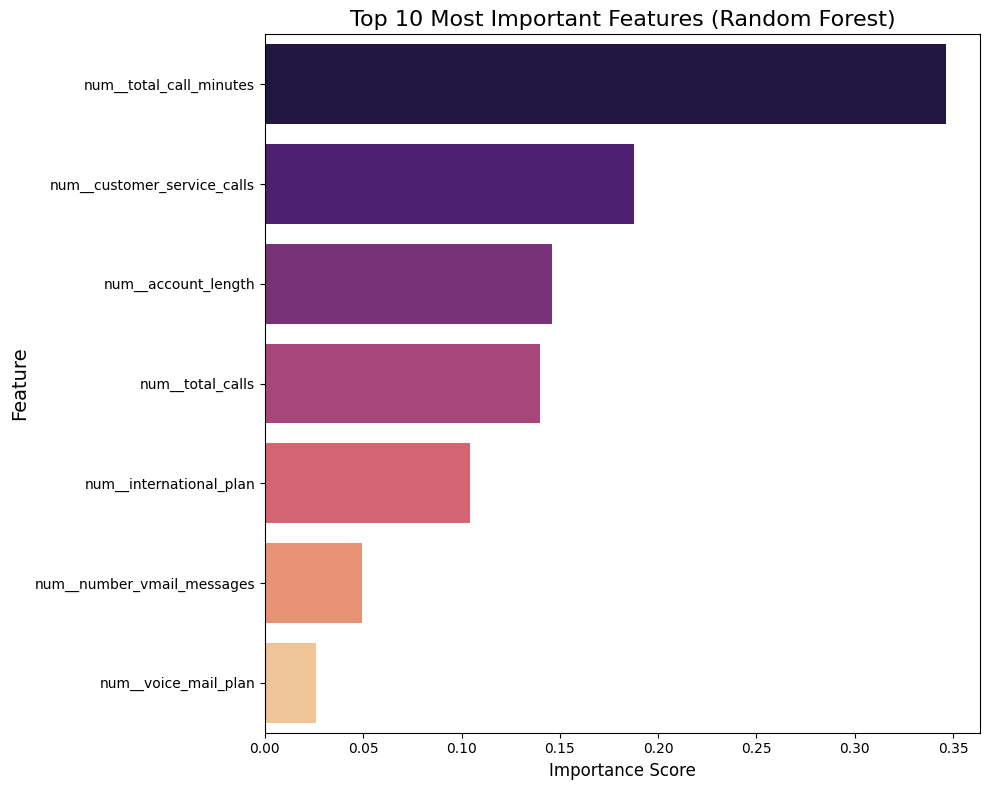

In [90]:
# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=rf_features_models.head(10), palette='magma')

plt.title('Top 10 Most Important Features (Random Forest)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

**Interpretation:**

* **num__total_call_minutes**

This feature the most important driver of churn prediction.
It suggests that the amount of time customers spend on calls has the strongest influence on whether they churn.

*   **num__customer_service_calls**
Customers who frequently contact customer service tend to churn more.This is expected since repeated service calls often indicate dissatisfaction.

*   **num__account_length**
The length of time a customer has stayed with the company matters, but not as much as call usage or service calls.
This implies that churn is not just about loyalty (long tenure), but about recent experiences.

*   **num__total_calls**
The total number of calls (not just minutes) also plays a role, which may capture customers with very high activity who could be at risk of switching if dissatisfied.

*   **num__international_plan**
Having an international plan contributes to churn prediction, though not as strongly as usage-based features.
Could be linked to pricing or unmet needs for international callers.


* **Voice-related features (num__number_vmail_messages, num__voice_mail_plan)**
These features have very low importance.
Likely because voicemail usage is not strongly tied to churn in this dataset.


In [91]:
 # get and Print XGBoost Feature Importance
print("\n XGBoost Feature Importance: \n")
xgb_importances = xgb_pipeline.named_steps['classifier'].feature_importances_
xgb_features_models= pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_importances
}).sort_values(by='importance', ascending=False)
print(xgb_features_models.head(10))


 XGBoost Feature Importance: 

                       feature  importance
2         num__voice_mail_plan    0.419566
1      num__international_plan    0.262801
4  num__customer_service_calls    0.131195
5      num__total_call_minutes    0.083199
6             num__total_calls    0.035335
0          num__account_length    0.034032
3   num__number_vmail_messages    0.033872


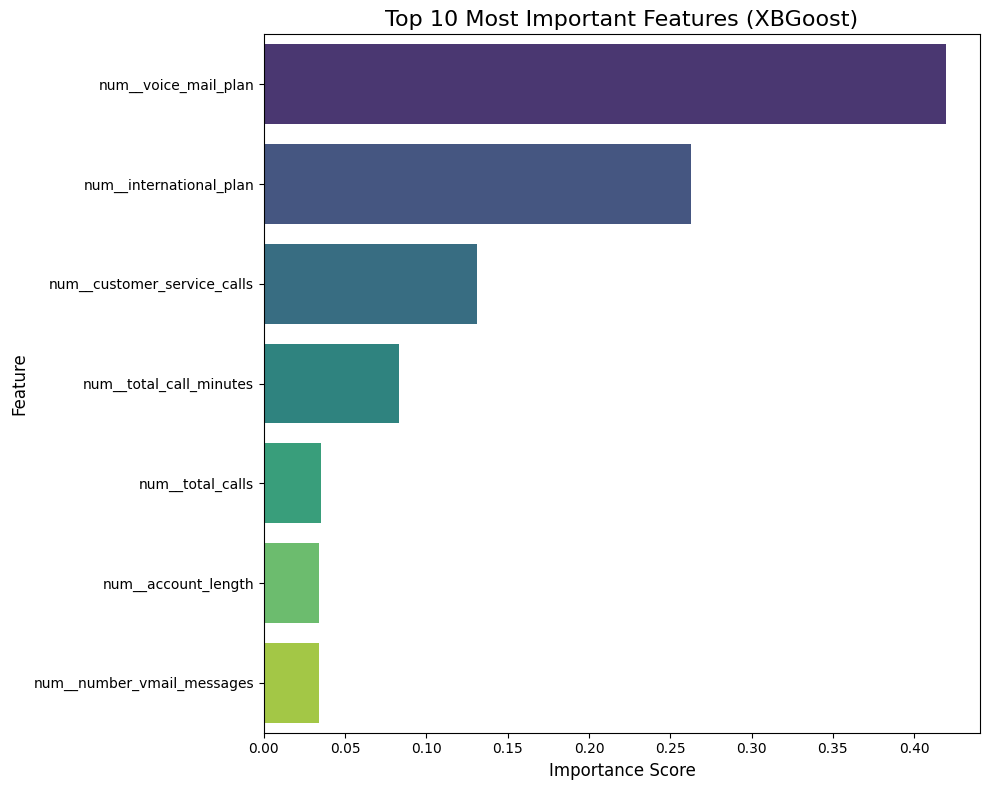

In [92]:
# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=xgb_features_models.head(10), palette='viridis')

plt.title('Top 10 Most Important Features (XBGoost)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

**Interpretation:**

**Voice mail plan and international plan**  strongly affect churn — customers with these plans may have higher or lower retention risk depending on how the model learned patterns.

**Customer service calls**  being important is logical — too many calls usually means dissatisfaction.

**Call usage (minutes, total calls)**  matters moderately, indicating churn depends partly on usage intensity.

**Account length and voicemail messages** have minor influence → they don’t strongly separate churners from non-churners.

In [93]:
#feature importance on logistic regression using coeffficients
#extracting coefficients
lr_coefs = logistic_pipeline.named_steps['classifier'].coef_[0]

#create dataframe
lr_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': lr_coefs,
    'odds_ratio': np.exp(lr_coefs)
}).sort_values(by='odds_ratio', ascending=False)
print(lr_importance.head(10))

                       feature  coefficient  odds_ratio
4  num__customer_service_calls     0.771399    2.162790
1      num__international_plan     0.703777    2.021373
5      num__total_call_minutes     0.688984    1.991692
3   num__number_vmail_messages     0.615062    1.849770
0          num__account_length     0.084917    1.088627
6             num__total_calls     0.084555    1.088233
2         num__voice_mail_plan    -0.989323    0.371828


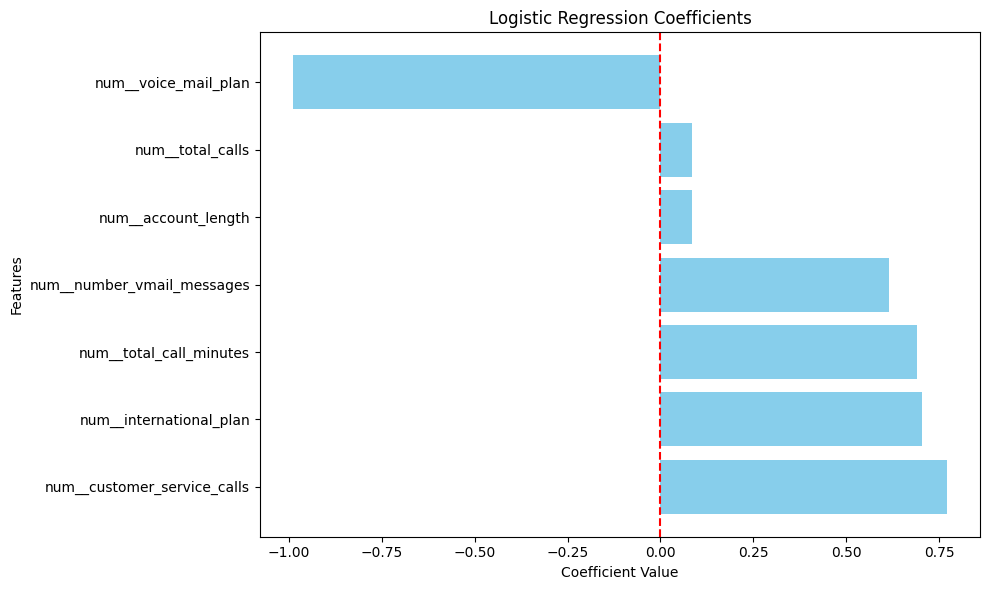

In [94]:
#plotting the lr coefficients
plt.figure(figsize=(10,6))
plt.barh(lr_importance["feature"], lr_importance["coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Logistic Regression Coefficients")
plt.axvline(x=0, color="red", linestyle="--")
plt.tight_layout()
plt.show()

**Interpretation:**

**Choosing The Best 2 Models and fixing class imbalance**

Random Forest and XGBoost are the best models.
I will use SMOTE (Synthetic Minority Oversampling Technique) for resampling




In [103]:
# training with SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#applying SMOTE to training set
smote = SMOTE(random_state=42)

#building random forest pipeline with SMOTE
rf_smote_pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                       ('smote',smote),
                                       ('classifier', RandomForestClassifier(random_state=42))])
#fit on the training data
rf_smote_pipeline.fit(X_train, y_train)
#predictions
y_pred_rf = rf_smote_pipeline.predict(X_test)

print("Random Forest with SMOTE(Classification Report):\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))







Random Forest with SMOTE(Classification Report):

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       570
           1       0.52      0.69      0.59        97

    accuracy                           0.86       667
   macro avg       0.73      0.79      0.75       667
weighted avg       0.88      0.86      0.87       667

Confusion Matrix:
[[507  63]
 [ 30  67]]


**Observations:**
After applying SMOTE, the model is much better in identifying churners. the recall of churners increased from 41% to 69% meaning the model is now catching 67 out of 97 actual churners which is an improvement from the previous 40.


In [104]:
#building xgboost pipeline with SMOTE
xgb_smote_pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                                       ('smote',smote),
                                       ('classifier', XGBClassifier(random_state=42))])
#fit on the training data
xgb_smote_pipeline.fit(X_train, y_train)
#predictions
y_pred_xgb = xgb_smote_pipeline.predict(X_test)

print("XGBoost with SMOTE(Classification Report):\n")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost with SMOTE(Classification Report):

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       570
           1       0.51      0.65      0.57        97

    accuracy                           0.86       667
   macro avg       0.72      0.77      0.74       667
weighted avg       0.87      0.86      0.86       667

Confusion Matrix:
[[509  61]
 [ 34  63]]


**Observations:**  After SMOTE, the model ability improved and can identify 65% of the actual churners, which is an improvement from 43%.


In [110]:
from sklearn.model_selection import GridSearchCV
#doing hypertuning  on random forest

# Create the pipeline with SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

#define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__criterion':['gini','entropy'],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1,2,4]
}
#setting GridSearch with the pipeline

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

#fitting  the grid search to the training data
print("Performing Grid Search")
grid_search.fit(X_train, y_train)

# getting the best parameters and best score
print("\nBest Parameters Found by Grid Search:")
print(grid_search.best_params_)
print("\nBest F1-Score Found by Grid Search:")
print(grid_search.best_score_)

#best model
best_model = grid_search.best_estimator_



Performing Grid Search
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Parameters Found by Grid Search:
{'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Best F1-Score Found by Grid Search:
0.6164160216642688


In [112]:
y_pred = best_model.predict(X_test)
print("\n Final Classification Report with Tuned Model:\n")
print(classification_report(y_test, y_pred))



 Final Classification Report with Tuned Model:

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       570
           1       0.50      0.69      0.58        97

    accuracy                           0.85       667
   macro avg       0.72      0.79      0.75       667
weighted avg       0.88      0.85      0.86       667



**Observations:**

The hyperparameter tuning process confirmed that, Random Forest with SMOTE, is robust and effective. It's now optimized to identify the customers who are most likely to churn.

In [113]:
acc2 = print(f" The model accuracy is {accuracy_score(y_test, y_pred)*100:.2f}%")
acc2

 The model accuracy is 85.46%


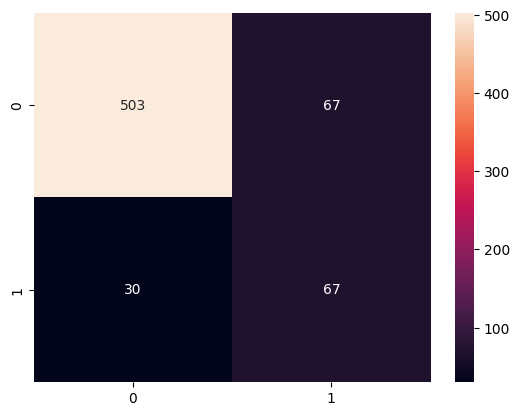

In [115]:
#check confusion matrix
conf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf2, annot=True, fmt=".0f");

**CONCLUSION:**

The analysis showed that customer churn is not random. It's heavily influenced by specific customer behaviors, with **service usage** and **customer service interactions** being the most telling factors. The data's imbalanced nature confirmed that we needed an advanced model, as no single feature could predict churn on its own. These initial insights validated our decision to build a complex, ensemble-based model.

**RECOMENDATION:**
The predictive model shows a clear path to reducing churn. The analysis indicates that the most important factors are customer engagement, with a strong focus on call behavior. By using the model and implementing the following recommendations, the company can proactively reduce its churn rate.



 1. **Implement a Proactive Churn Intervention System**

Use the model to find at-risk customers before they leave. Have the team proactively reach out to them and address their issues.

 2. **Improve Customer Service**

The model shows that a high number of service calls predicts churn. Address the root causes of these calls to lower the churn rate.

 3. **Monitor Service Usage**

The model highlights total_call_minutes as a key factor. Monitor for unusual usage patterns—both high and low to identify and engage with potentially disengaged customers.


